In [1]:
from ppget.source import ModelSource

start_date = "2007-07-01"
end_date = "2008-07-01"
feature = "Global_active_power"

source = ModelSource.load(start_date, end_date, feature)
source.missing_data()

Series([], Freq: 10T, Name: Global_active_power, dtype: float64)

In [2]:
series = source.series()
series.head()

timestamp
2007-07-01 00:00:00    2.6812
2007-07-01 00:10:00    2.6502
2007-07-01 00:20:00    2.6266
2007-07-01 00:30:00    2.5242
2007-07-01 00:40:00    2.6000
Freq: 10T, Name: Global_active_power, dtype: float64

In [4]:
from ppget.datastructure import DatasetBuilder, TrainSplit

MODEL_NAME = "model/sarimax/"

b = DatasetBuilder(series, data_split=TrainSplit(), window_size=1)

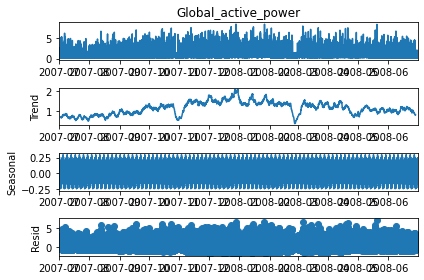

In [22]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

s = seasonal_decompose(series, model='add', period=60*10)
s[2200:2400].plot()
plt.show()

In [23]:
%%time
from pmdarima import auto_arima

auto_arima(series, seasonal=True, m=12, trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=122.66 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=84579.876, Time=9.67 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=84352.922, Time=16.77 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=84259.241, Time=20.51 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=84577.876, Time=0.50 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=84261.886, Time=4.31 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=84256.881, Time=55.01 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=84259.349, Time=32.95 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=84256.252, Time=48.67 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=84254.161, Time=46.77 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=84575.716, Time=32.28 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=81542.160, Time=209.13 sec
 ARIMA(1,1,1)(1,0,0)[12] intercept   : AIC=inf, Time=109.00 sec
 ARIMA(1,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=307.79 sec
 ARIMA(1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                52704
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 12)   Log Likelihood              -40765.080
Date:                             Sat, 04 Jun 2022   AIC                          81542.160
Time:                                     00:18:45   BIC                          81595.395
Sample:                                          0   HQIC                         81558.795
                                           - 52704                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.414e-05   8.51e-05      0.636      0.525      -0.000       0.000
ar.L1          0.8624      0.003    301.449      0.000       0.857       0.868
ma.L1         -0.9749      0.002   -582.700      0.000      -0.978      -0.972
ar.S.L12      -0.0131      0.004     -3.399      0.001      -0.021      -0.006
ar.S.L24      -0.0155      0.004     -3.446      0.001      -0.024      -0.007
sigma2         0.2762      0.001    337.648      0.000       0.275       0.278
===================================================================================
Ljung-Box (L1) (Q):                   4.33   Jarque-Bera (JB):            270293.87
Prob(Q):                              0.04   Prob(JB):                         0.00
Heteroskedasticity (H):               1.16   Skew:                             1.50
Prob(H) (two-sided):                  0.00   Kurtosis:                        13.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [27]:
import pandas as pd
from ppget.datastructure import DatasetBuilder, TrainSplit

WINDOW = 1
MODEL_NAME = "model/cnn1d_time_cluster/"

builder = DatasetBuilder(series, data_split=TrainSplit(), window_size=WINDOW, normalised=False)

S = builder.build_splits()

S["training"]["X"].shape, S["training"]["y"].shape, S["test"]["X"].shape, S["test"]["y"].shape

((47432, 1, 1), (47432,), (5271, 1, 1), (5271,))

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(S["training"]["X"].flatten(), order=(1, 1, 1),
               seasonal_order=(2, 0, 1, 12))
res = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  7.76101D-01    |proj g|=  3.79520D-02


 This problem is unconstrained.



At iterate    5    f=  7.74274D-01    |proj g|=  4.70614D-02

At iterate   10    f=  7.71519D-01    |proj g|=  1.93961D-03

At iterate   15    f=  7.70946D-01    |proj g|=  1.27015D-02

At iterate   20    f=  7.66028D-01    |proj g|=  2.29445D-02

At iterate   25    f=  7.64790D-01    |proj g|=  1.74531D-03

At iterate   30    f=  7.64771D-01    |proj g|=  2.57250D-04

At iterate   35    f=  7.64771D-01    |proj g|=  2.14238D-04

At iterate   40    f=  7.64756D-01    |proj g|=  1.12138D-02

At iterate   45    f=  7.64705D-01    |proj g|=  2.25931D-03

At iterate   50    f=  7.64704D-01    |proj g|=  8.03275D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

/Users/rodrigoleite/.local/share/virtualenvs/ppget-aprendizado-de-maquinas-Z2By2H12/lib/python3.7/site-packages/statsmodels/base/model.py:606: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)


**DEAD END!**